# Import Library

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Load Data, Eksplorasi Data Sederhana, dan Data Cleaning

Boilerplate untuk membuka file excel dengan menggunakan pandas

## Contoh : Sheet "Kasus Aktif"

In [152]:
data = 'data/COVID-19 Indonesia.xlsx'
df_total = pd.read_excel(data)
df_total.head()

,Date,Kasus harian,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),...,Positif DKI,Unnamed: 76,Pos Rate DKI,Pos Rate DKI - 7 harian,NON DKI,Positif Non DKI,Unnamed: 81,Pos Rate Non DKI,Pos Rate Non DKI - 7 harian,CFR
0,2020-03-02,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-04,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-05,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-06,2.0,0.0,2.0,4.0,4.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
data = 'data/COVID-19 Indonesia.xlsx'
daily_cases=pd.read_excel(data,sheet_name='Kasus Aktif')

daily_cases.head()

,Date,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
0,2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-16,NaN,NaN,1.0,NaN,NaN,NaN,14.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-18,NaN,NaN,4.0,NaN,NaN,1.0,30.0,NaN,12.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-19,NaN,NaN,10.0,NaN,NaN,2.0,52.0,NaN,2.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
#Handling Missing Value
daily_cases.fillna(0,inplace=True)
daily_cases.set_index('Date',inplace=True)
daily_cases.head()

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,...,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-15,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-16,0.0,0.0,1.0,0.0,0.0,0.0,14.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-18,0.0,0.0,4.0,0.0,0.0,1.0,30.0,0.0,12.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-19,0.0,0.0,10.0,0.0,0.0,2.0,52.0,0.0,2.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


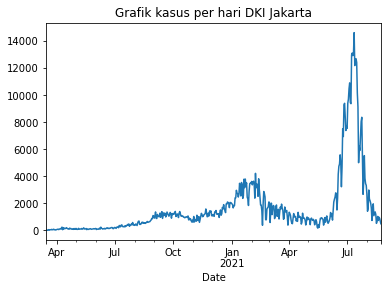

In [155]:
# plot grafik pertumbuhan jakarta

daily_cases['Jakarta'].plot();
plt.title("Grafik kasus per hari DKI Jakarta");

### Jawablah Pertanyaan Berikut dan Ceritakan dalam Bentuk Grafik / Visualisasi

- Bagaimana perkembangan covid-19 di Indonesia?
- Apakah kita sudah mengalami puncak kedua?
- Provinsi mana yang paling banyak total kasusnya? (bandingkan hingga 15 provinsi teratas)
- Apakah PPKM sudah cukup efektif mengurangi kasus Covid-19?
- Bagaimana perkembangan vaksinasi di Indonesia baik dosis pertama atau kedua?

In [156]:
daily_cases.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 527 entries, 2020-03-15 to 2021-08-23
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Aceh       527 non-null    float64
 1   Bali       527 non-null    float64
 2   Banten     527 non-null    float64
 3   Babel      527 non-null    float64
 4   Bengkulu   527 non-null    float64
 5   DIY        527 non-null    float64
 6   Jakarta    527 non-null    float64
 7   Jambi      527 non-null    float64
 8   Jabar      527 non-null    float64
 9   Jateng     527 non-null    float64
 10  Jatim      527 non-null    float64
 11  Kalbar     527 non-null    float64
 12  Kaltim     527 non-null    float64
 13  Kalteng    527 non-null    float64
 14  Kalsel     527 non-null    float64
 15  Kaltara    527 non-null    float64
 16  Kep Riau   527 non-null    float64
 17  NTB        527 non-null    float64
 18  Sumsel     527 non-null    float64
 19  Sumbar     527 non-null    floa

In [157]:
# Melihat apakah ada nilai yang negatif
print(daily_cases.where(daily_cases < 0).count())

Aceh         0
Bali         0
Banten       0
Babel        0
Bengkulu     0
DIY          1
Jakarta      0
Jambi        0
Jabar        0
Jateng       0
Jatim        0
Kalbar       0
Kaltim       0
Kalteng      0
Kalsel       0
Kaltara      0
Kep Riau     0
NTB          0
Sumsel       0
Sumbar       0
Sulut        0
Sumut        0
Sultra       0
Sulsel       0
Sulteng      0
Lampung      0
Riau         1
Malut        0
Maluku       0
Papbar       0
Papua        0
Sulbar       0
NTT          0
Gorontalo    0
dtype: int64


In [158]:
daily_cases.abs()

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,...,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-15,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-16,0.0,0.0,1.0,0.0,0.0,0.0,14.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-18,0.0,0.0,4.0,0.0,0.0,1.0,30.0,0.0,12.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-19,0.0,0.0,10.0,0.0,0.0,2.0,52.0,0.0,2.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-19,355.0,1032.0,395.0,452.0,129.0,1175.0,731.0,357.0,3266.0,1428.0,...,833.0,375.0,835.0,42.0,13.0,84.0,200.0,99.0,714.0,99.0
2021-08-20,459.0,1039.0,449.0,440.0,98.0,820.0,968.0,325.0,2742.0,3432.0,...,595.0,371.0,764.0,18.0,17.0,53.0,136.0,89.0,491.0,118.0
2021-08-21,382.0,849.0,374.0,393.0,71.0,930.0,891.0,321.0,1747.0,1236.0,...,546.0,319.0,610.0,35.0,11.0,22.0,187.0,109.0,377.0,47.0


In [159]:
daily_cases['DIY'].loc[(daily_cases['DIY']<0)]

Date
2020-03-20   -1.0
Name: DIY, dtype: float64

In [160]:
daily_cases['Riau'].loc[(daily_cases['Riau']<0)]

Date
2020-03-20   -1.0
Name: Riau, dtype: float64

In [161]:
daily_cases.loc[(daily_cases['DIY']<0)] = 1.0

In [162]:
daily_cases.loc[(daily_cases['Riau']<0)] = 1.0

In [163]:
# Melihat apakah ada nilai yang negatif
print(daily_cases.where(daily_cases < 0).count())

Aceh         0
Bali         0
Banten       0
Babel        0
Bengkulu     0
DIY          0
Jakarta      0
Jambi        0
Jabar        0
Jateng       0
Jatim        0
Kalbar       0
Kaltim       0
Kalteng      0
Kalsel       0
Kaltara      0
Kep Riau     0
NTB          0
Sumsel       0
Sumbar       0
Sulut        0
Sumut        0
Sultra       0
Sulsel       0
Sulteng      0
Lampung      0
Riau         0
Malut        0
Maluku       0
Papbar       0
Papua        0
Sulbar       0
NTT          0
Gorontalo    0
dtype: int64


### 1. Bagaimana perkembangan covid-19 di Indonesia?

In [164]:
daily_cases['Kasus_Aktif_Nasional'] = daily_cases.sum(axis=1)

In [165]:
daily_cases.head()

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,...,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,Kasus_Aktif_Nasional
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-15,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
2020-03-16,0.0,0.0,1.0,0.0,0.0,0.0,14.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
2020-03-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-18,0.0,0.0,4.0,0.0,0.0,1.0,30.0,0.0,12.0,2.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
2020-03-19,0.0,0.0,10.0,0.0,0.0,2.0,52.0,0.0,2.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0


In [166]:
# Plot Grafik Kasus Covid-19 Nasional
# daily_cases['Nasional'].plot(kind='line', title='Kasus Covid-19 Harian secara Nasional', figsize=(16,9))

fig = px.line(daily_cases,x= daily_cases.index ,y='Kasus_Aktif_Nasional',
             labels= {"Kasus_Aktif_Nasional" : "Jumlah Kasus Harian Nasional"},
              title="Kasus Harian Covid-19 di Indonesia")
fig.update_layout(
    title_font_color="black",
    title_font_size=35,
    title={'y':0.9,
            'x':0.5})
fig.show()

### 2. Apakah kita sudah mengalami puncak kedua?

# Data Sembuh

In [167]:
data_sembuh=pd.read_excel(data,sheet_name='Sembuh Harian')

data_sembuh

,Date,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
0,2020-03-21,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2021-08-19,238.0,1025.0,408.0,587.0,100.0,2121.0,934.0,362.0,6680.0,...,803.0,266.0,702.0,165.0,96.0,213.0,73.0,209.0,940.0,165.0
517,2021-08-20,244.0,1244.0,470.0,581.0,100.0,2347.0,948.0,340.0,3071.0,...,842.0,430.0,1187.0,64.0,133.0,117.0,61.0,108.0,1210.0,199.0
518,2021-08-21,255.0,1197.0,152.0,483.0,103.0,2547.0,915.0,194.0,1654.0,...,577.0,441.0,1119.0,66.0,98.0,379.0,50.0,121.0,595.0,120.0
519,2021-08-22,178.0,1055.0,862.0,443.0,189.0,1123.0,1102.0,480.0,1830.0,...,755.0,419.0,669.0,136.0,150.0,336.0,59.0,104.0,621.0,177.0


In [168]:
# Menghilangkan missing value
data_sembuh.fillna(0, inplace=True)

In [169]:
data_sembuh.set_index('Date', inplace=True)
data_sembuh.head()

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,...,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-21,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-22,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-23,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Meninggal

In [170]:
data_meninggal = pd.read_excel(data,sheet_name='Meninggal Harian')
data_meninggal.head()

,Date,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
0,2020-03-21,NaN,NaN,1.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-22,NaN,1.0,1.0,NaN,NaN,NaN,6.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-24,NaN,NaN,1.0,NaN,NaN,1.0,2.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-25,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
# Menghilangkan missing value dan membuat tanggal menjadi index
data_meninggal.fillna(0, inplace=True)
data_meninggal.set_index('Date', inplace=True)
data_meninggal.head()

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,...,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-21,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-22,0.0,1.0,1.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-24,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Perbandingan Jumlah Kasus, sembuh, dan meninggal

In [172]:
data_sembuh['Nasional'] = data_sembuh.sum(axis=1)
data_sembuh.head()

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,...,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,Nasional
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-21,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2020-03-22,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
2020-03-23,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-03-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [173]:
data_meninggal['Nasional'] = data_meninggal.sum(axis=1)
data_meninggal.head()

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,...,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,Nasional
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-21,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2020-03-22,0.0,1.0,1.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
2020-03-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-03-24,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2020-03-25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [174]:
# Menambahkan data sembuh dan data meninggal ke data daily_cases
daily_cases['Sembuh_Harian_Nasional'] = data_sembuh['Nasional']
daily_cases['Meninggal_Harian_Nasional'] = data_meninggal['Nasional']
daily_cases.head()

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,...,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,Kasus_Aktif_Nasional,Sembuh_Harian_Nasional,Meninggal_Harian_Nasional
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-15,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,NaN,NaN
2020-03-16,0.0,0.0,1.0,0.0,0.0,0.0,14.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,NaN,NaN
2020-03-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2020-03-18,0.0,0.0,4.0,0.0,0.0,1.0,30.0,0.0,12.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,NaN,NaN
2020-03-19,0.0,0.0,10.0,0.0,0.0,2.0,52.0,0.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,NaN,NaN


In [175]:
# Menhilangkan missing value
daily_cases.fillna(0, inplace=True)
daily_cases.head()

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,...,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,Kasus_Aktif_Nasional,Sembuh_Harian_Nasional,Meninggal_Harian_Nasional
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-15,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0
2020-03-16,0.0,0.0,1.0,0.0,0.0,0.0,14.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0
2020-03-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-18,0.0,0.0,4.0,0.0,0.0,1.0,30.0,0.0,12.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0
2020-03-19,0.0,0.0,10.0,0.0,0.0,2.0,52.0,0.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,0.0,0.0


In [176]:
# fig,ax=plt.subplots(figsize=(16,6))

# daily_cases['Kasus_Aktif_Nasional'].plot(kind='line',ax=ax,label='Kasus Harian')
# daily_cases['Sembuh_Harian_Nasional'].plot(kind='line',ax=ax,label='Sembuh Harian')
# daily_cases['Meninggal_Harian_Nasional'].plot(kind='line',ax=ax,label='Kematian Harian')
# ax.set_xlabel('Tanggal')
# ax.set_title('Pergerakan Kasus Aktif, Sembuh dan Meninggal Covid-19 di Indonesia')
# ax.legend()




fig = px.line(daily_cases,x= daily_cases.index ,y=['Kasus_Aktif_Nasional', 'Sembuh_Harian_Nasional', 'Meninggal_Harian_Nasional'],
             labels= {"value" : "Jumlah" ,
                     "Date": "Tanggal"},
              title="Pergerakan Kasus Aktif, Sembuh dan Meninggal Covid-19 di Indonesia",
               color_discrete_map={
                 "Kasus_Aktif_Nasional": "#42adf5",
                 "Sembuh_Harian_Nasional": "#42f58d",
               "Meninggal_Harian_Nasional": "red"})

fig.update_layout(
    title_font_color="black",
    title_font_size=25,
    title={'y':0.9,'x':0.5})



# legend_name = ["Kasus Harian", "Sembuh Harian", "Meninggal Harian"]

# for idx, name in enumerate(legend_name):
#     fig.data[idx].name = name
#     fig.data[idx].hovertemplate = name
    
    
fig.show()

### 3. Provinsi mana yang paling banyak total kasusnya? (bandingkan hingga 15 provinsi teratas)

In [255]:
data_provinsi = daily_cases.drop(columns=['Kasus_Aktif_Nasional', 'Sembuh_Harian_Nasional', 'Meninggal_Harian_Nasional']).sum().sort_values(ascending=False)[:10]
data_provinsi

Jakarta    846567.0
Jabar      670278.0
Jateng     462973.0
Jatim      373460.0
Kaltim     146193.0
DIY        145123.0
Banten     126965.0
Riau       119938.0
Bali       102571.0
Sulsel     101623.0
dtype: float64

In [260]:
# fig,ax=plt.subplots(figsize=(16,6))
# data_provinsi.plot(kind='bar')
# ax.set_ylabel('Total Kasus')
# ax.set_title('Total Kasus Per Provinsi per Tanggal 23 Agustus 2021')

fig = px.bar(data_provinsi,labels= {"value" : "Jumlah" , "index": "Provinsi"}, color_discrete_sequence =['green'])
fig.show()

### 4. Apakah PPKM sudah cukup efektif mengurangi kasus Covid-19?

In [179]:
jumlah_tertinggi = daily_cases['Kasus_Aktif_Nasional'].max()
jumlah_tertinggi

56757.0

In [180]:
kasus_tertinggi = daily_cases.loc[( daily_cases['Kasus_Aktif_Nasional'] == 56757.0)]
kasus_tertinggi

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,...,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,Kasus_Aktif_Nasional,Sembuh_Harian_Nasional,Meninggal_Harian_Nasional
Date,,,,,,,,,,,,,,,,,,,,,
2021-07-15,100.0,843.0,3994.0,511.0,372.0,2706.0,12691.0,388.0,11101.0,4360.0,...,199.0,162.0,350.0,318.0,117.0,639.0,63.0,56757.0,19049.0,982.0


In [261]:
# fig,ax=plt.subplots(figsize=(16,6))

fig = px.line(daily_cases,x= daily_cases.index ,y='Kasus_Aktif_Nasional',
             labels= {"Kasus_Aktif_Nasional" : "Jumlah Kasus Harian Nasional"},
              title="Efek PPKM terhadap Kasus Covid-19")
#               range_x=['2021-01-01','2021-08-23']
fig.update_layout(
    title_font_color="black",
    title_font_size=35,
    title={'y':0.9,
            'x':0.5})

fig.update_xaxes(
    rangeslider_visible=True,
    tickformatstops = [
        dict(dtickrange=[None, 1000], value="%H:%M:%S.%L ms"),
        dict(dtickrange=[1000, 60000], value="%H:%M:%S s"),
        dict(dtickrange=[60000, 3600000], value="%H:%M m"),
        dict(dtickrange=[3600000, 86400000], value="%H:%M h"),
        dict(dtickrange=[86400000, 604800000], value="%e. %b d"),
        dict(dtickrange=[604800000, "M1"], value="%e. %b w"),
        dict(dtickrange=["M1", "M12"], value="%b '%y M"),
        dict(dtickrange=["M12", None], value="%Y Y")
    ]
)

fig.add_vrect(
    x0="2021-01-11", x1="2021-02-08",
    fillcolor="#ebb134", opacity=0.5,
    layer="below", line_width=0,
    annotation_text="PPKM",
    annotation_position="top left",
    
),
fig.add_vrect(
    x0="2021-02-09", x1="2021-06-28",
    fillcolor="#ebcc34", opacity=0.5,
    layer="below", line_width=0,
    annotation_text="PPKM Mikro",
    annotation_position="top left"
),
fig.add_vrect(
    x0="2021-07-03", x1="2021-07-25",
    fillcolor="#eb7734", opacity=0.5,
    layer="below", line_width=0,
    annotation_text="PPKM darurat",
    annotation_position="top left"
),
fig.add_vrect(
    x0="2021-07-26", x1="2021-08-23",
    fillcolor="#eb4934", opacity=0.5,
    layer="below", line_width=0,
    annotation_text="PPKM Level 4",
    annotation_position="top left"
)

fig.update_annotations(textangle=90)

fig.show()


### 5. Bagaimana perkembangan vaksinasi di Indonesia baik dosis pertama atau kedua?

In [182]:
data_vaksin=df_total[['Date','Dosis pertama (harian)','Dosis kedua (harian)']]
data_vaksin

,Date,Dosis pertama (harian),Dosis kedua (harian)
0,2020-03-02,NaN,NaN
1,2020-03-03,NaN,NaN
2,2020-03-04,NaN,NaN
3,2020-03-05,NaN,NaN
4,2020-03-06,NaN,NaN
...,...,...,...
563,NaT,NaN,NaN
564,NaT,NaN,NaN
565,NaT,NaN,NaN
566,NaT,NaN,NaN


In [183]:
# Ganti Nama Kolom

data_vaksin.rename({'Dosis pertama (harian)':'Dosis 1','Dosis kedua (harian)':'Dosis 2'},axis=1,inplace=True)
data_vaksin

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Dosis 1,Dosis 2
0,2020-03-02,NaN,NaN
1,2020-03-03,NaN,NaN
2,2020-03-04,NaN,NaN
3,2020-03-05,NaN,NaN
4,2020-03-06,NaN,NaN
...,...,...,...
563,NaT,NaN,NaN
564,NaT,NaN,NaN
565,NaT,NaN,NaN
566,NaT,NaN,NaN


In [184]:
data_vaksin['Dosis 1'].fillna(0, inplace=True)
data_vaksin['Dosis 2'].fillna(0, inplace=True)
data_vaksin

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Dosis 1,Dosis 2
0,2020-03-02,0.0,0.0
1,2020-03-03,0.0,0.0
2,2020-03-04,0.0,0.0
3,2020-03-05,0.0,0.0
4,2020-03-06,0.0,0.0
...,...,...,...
563,NaT,0.0,0.0
564,NaT,0.0,0.0
565,NaT,0.0,0.0
566,NaT,0.0,0.0


In [185]:
data_vaksin.dropna(inplace=True)
data_vaksin.set_index('Date', inplace=True)
data_vaksin

<ipython-input-185-da21a6a46bde>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Dosis 1,Dosis 2
Date,,
2020-03-02,0.0,0.0
2020-03-03,0.0,0.0
2020-03-04,0.0,0.0
2020-03-05,0.0,0.0
2020-03-06,0.0,0.0
...,...,...
2021-08-19,644813.0,702847.0
2021-08-20,357948.0,355245.0
2021-08-21,598148.0,619482.0


Text(0.5, 0.98, 'Data Vaksin Nasional')

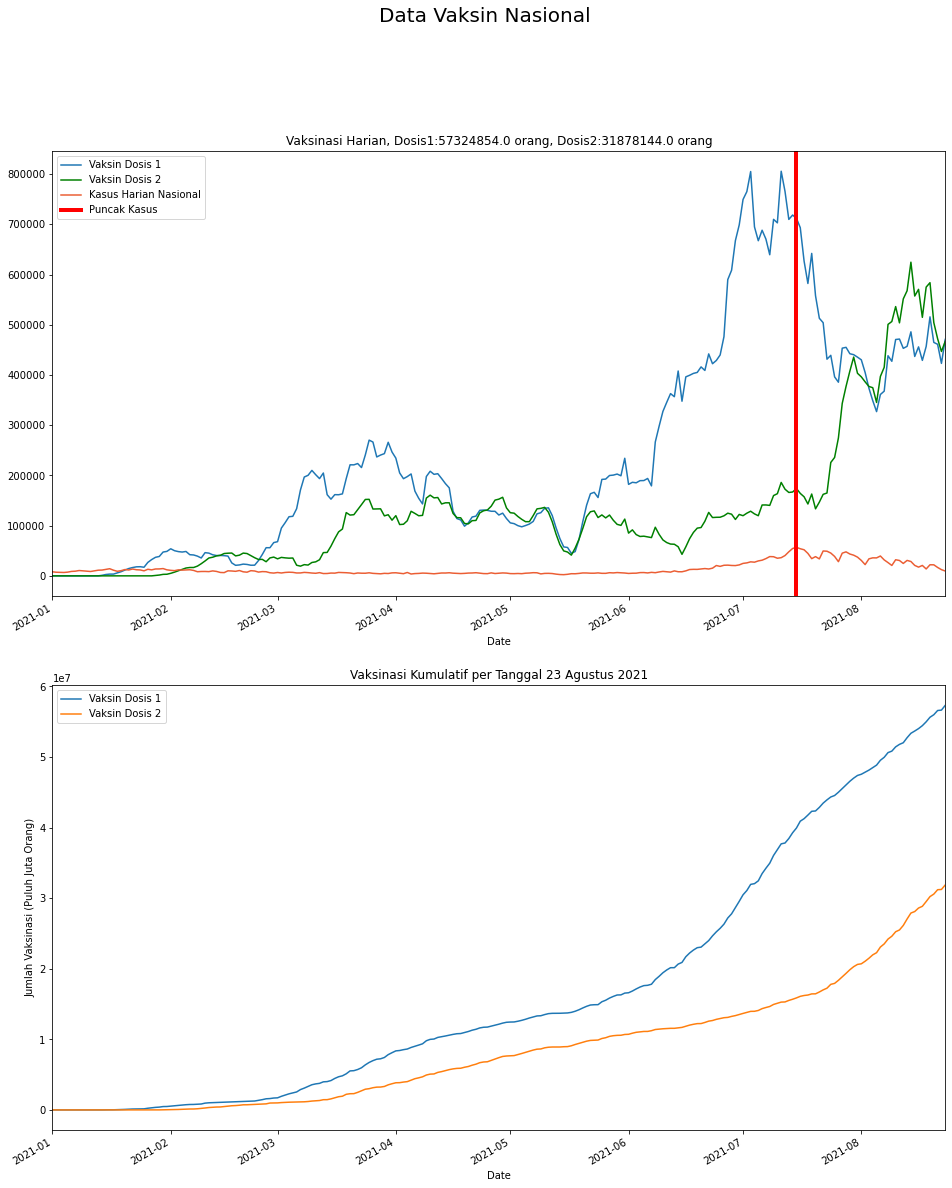

In [186]:
fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(16,20))

data_vaksin['Dosis 1'].rolling(window=7).mean().plot(kind='line',label='Vaksin Dosis 1', ax=ax[0])
data_vaksin['Dosis 2'].rolling(window=7).mean().plot(kind='line',label='Vaksin Dosis 2', ax=ax[0], color="green")
daily_cases['Kasus_Aktif_Nasional'].plot(kind='line',label='Kasus Harian Nasional', ax=ax[0], color="#eb5e34")

ax[0].set_title('Vaksinasi Total = Dosis pertama :{} orang | Dosis kedua :{} orang'.format(data_vaksin['Dosis 1'].sum(),data_vaksin['Dosis 2'].sum()))
ax[0].legend() 
ax[0].set_xlim('2021-01-01','2021-08-23')

ax[0].axvline(x='2021-07-15', color='r',linewidth=4, label='Puncak Kasus')

ax[0].set_title('Vaksinasi Harian, Dosis1:{} orang, Dosis2:{} orang'.format(data_vaksin['Dosis 1'].sum(),data_vaksin['Dosis 2'].sum()))
ax[0].legend()
ax[0].set_xlim('2021-01-01','2021-08-23')

data_vaksin['Dosis 1'].cumsum().plot(kind='line',ax=ax[1],label='Vaksin Dosis 1')
data_vaksin['Dosis 2'].cumsum().plot(kind='line',ax=ax[1],label='Vaksin Dosis 2')
ax[1].set_xlim('2021-01-01','2021-08-23')
ax[1].set_ylabel('Jumlah Vaksinasi (Puluh Juta Orang)')
ax[1].set_title('Vaksinasi Kumulatif per Tanggal 23 Agustus 2021')
ax[1].legend()
ax[1].set_xlim('2021-01-01','2021-08-23')

fig.suptitle("Data Vaksin Nasional", fontsize=20)



In [190]:
# Komposisi Vaksinasi
day_statistic=pd.read_excel(data,sheet_name='Statistik Harian')
day_statistic.set_index('Date', inplace=True)
day_statistic.head()

,Kasus harian,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),Tingkat kesembuhan (closed cases),...,Positif DKI,Unnamed: 76,Pos Rate DKI,Pos Rate DKI - 7 harian,NON DKI,Positif Non DKI,Unnamed: 81,Pos Rate Non DKI,Pos Rate Non DKI - 7 harian,CFR
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-02,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-05,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,2.0,0.0,2.0,4.0,4.0,1.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
dosis_pertama_kesehatan = day_statistic.loc['2021-08-23']['Dosis pertama (SDM kesehatan)'].values[0]
dosis_kedua_kesehatan = day_statistic.loc['2021-08-23']["Dosis kedua (SDM kesehatan)"].values[0]
dosis_ketiga_kesehatan = day_statistic.loc['2021-08-23']["Dosis ketiga (SDM kesehatan)"].values[0]
dosis_pertama_publik = day_statistic.loc['2021-08-23']["Dosis pertama (petugas publik)"].values[0]
dosis_kedua_publik = day_statistic.loc['2021-08-23']["Dosis kedua (petugas publik)"].values[0]
dosis_pertama_lansia = day_statistic.loc['2021-08-23']["Dosis pertama (lansia)"].values[0]
dosis_kedua_lansia = day_statistic.loc['2021-08-23']["Dosis kedua (lansia)"].values[0]
dosis_pertama_umum = day_statistic.loc['2021-08-23']["Dosis pertama (warga umum)"].values[0]
dosis_kedua_umum = day_statistic.loc['2021-08-23']["Dosis kedua (warga umum)"].values[0]
dosis_pertama_remaja = day_statistic.loc['2021-08-23']["Dosis pertama (remaja)"].values[0]
dosis_kedua_remaja = day_statistic.loc['2021-08-23']["Dosis kedua (remaja)"].values[0]
dosis_pertama_vakgor = day_statistic.loc['2021-08-23']["Dosis pertama (Vakgor)"].values[0]
dosis_kedua_vakgor = day_statistic.loc['2021-08-23']["Dosis kedua (Vakgor)"].values[0]

In [219]:
#jumlah total vaksin masing_masing bidang
dosis_kesehatan = dosis_pertama_kesehatan + dosis_kedua_kesehatan + dosis_ketiga_kesehatan
dosis_publik = dosis_pertama_publik + dosis_kedua_publik
dosis_lansia = dosis_pertama_lansia + dosis_kedua_lansia
dosis_umum = dosis_pertama_umum + dosis_kedua_umum
dosis_remaja = dosis_pertama_remaja + dosis_kedua_remaja
dosis_vakgor = dosis_pertama_vakgor + dosis_kedua_vakgor

vaksin_pertama_total = dosis_pertama_kesehatan + dosis_pertama_publik + dosis_pertama_lansia + dosis_pertama_umum + dosis_pertama_remaja + dosis_pertama_vakgor
vaksin_kedua_total = dosis_kedua_kesehatan + dosis_kedua_publik + dosis_kedua_lansia + dosis_kedua_umum + dosis_kedua_remaja + dosis_kedua_vakgor 


dosis_total = dosis_kesehatan + dosis_publik + dosis_lansia + dosis_umum + dosis_remaja + dosis_vakgor

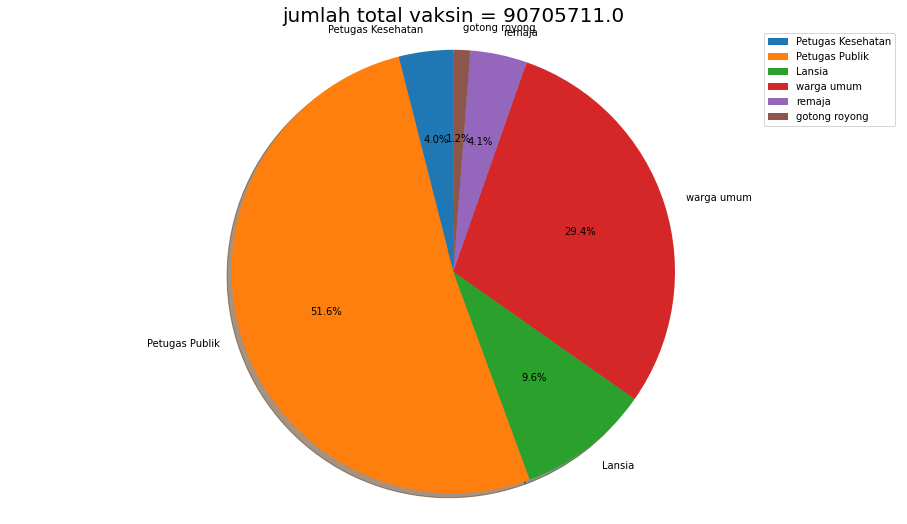

In [220]:
# Dosis vaksin di tiap kategori
labels = 'Petugas Kesehatan', 'Petugas Publik', 'Lansia', 'warga umum', 'remaja', 'gotong royong'
data = [dosis_kesehatan, dosis_publik, dosis_lansia, dosis_umum, dosis_remaja,dosis_vakgor ]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(16,9))
ax1.pie(data, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend()
ax1.set_title('jumlah total vaksin = {}'.format(dosis_total), fontsize=20)
plt.show()

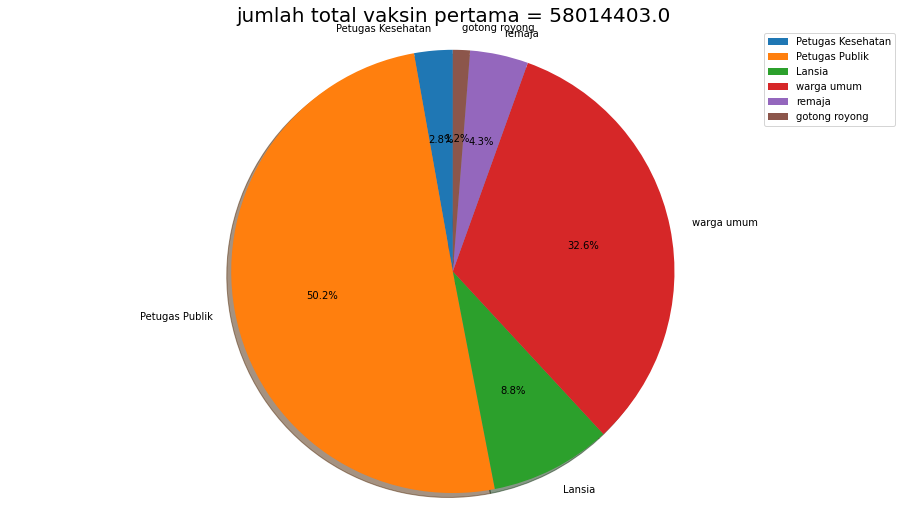

In [221]:
# Vaksin Pertama
labels = 'Petugas Kesehatan', 'Petugas Publik', 'Lansia', 'warga umum', 'remaja', 'gotong royong'
data = [dosis_pertama_kesehatan, dosis_pertama_publik, dosis_pertama_lansia, dosis_pertama_umum, dosis_pertama_remaja,dosis_pertama_vakgor ]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(16,9))
ax1.pie(data, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend()
ax1.set_title('jumlah total vaksin pertama = {}'.format(vaksin_pertama_total), fontsize=20)
plt.show()

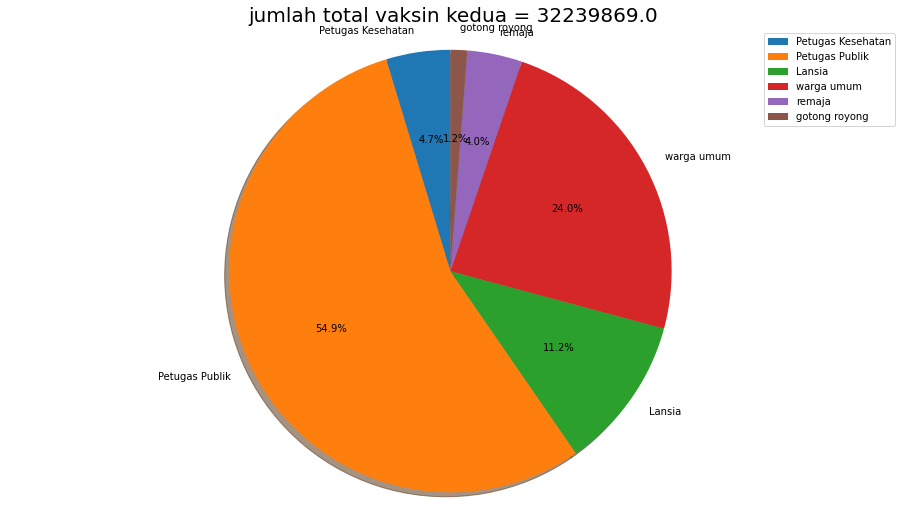

In [222]:
#vaksin kedua 
labels = 'Petugas Kesehatan', 'Petugas Publik', 'Lansia', 'warga umum', 'remaja', 'gotong royong'
data = [dosis_kedua_kesehatan, dosis_kedua_publik, dosis_kedua_lansia, dosis_kedua_umum, dosis_kedua_remaja,dosis_kedua_vakgor ]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(16,9))
ax1.pie(data, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend()
ax1.set_title('jumlah total vaksin kedua = {}'.format(vaksin_kedua_total), fontsize=20)
plt.show()

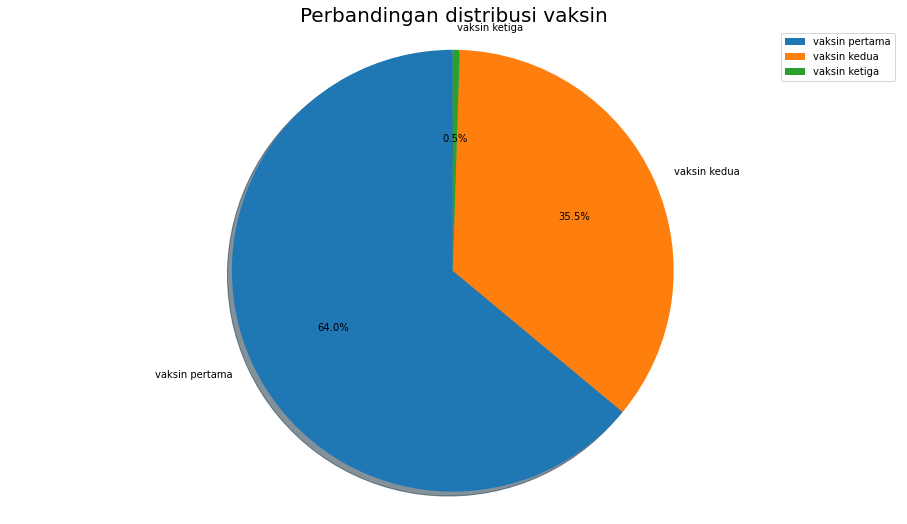

In [262]:
#Perbandingan vaksin pertama, kedua dan ketiga
labels = 'vaksin pertama', 'vaksin kedua', 'vaksin ketiga'
data = [vaksin_pertama_total, vaksin_kedua_total, dosis_ketiga_kesehatan ]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(16,9))
ax1.pie(data, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend()
ax1.set_title('Perbandingan distribusi vaksin',  fontsize=20)
plt.show()

In [250]:
fig = go.Figure(layout_title_text="Data Vaksin Harian")

fig.add_trace(go.Scatter(
    x=day_statistic.index,
    y=day_statistic['Dosis pertama (SDM kesehatan)'],
    name='Dosis pertama (SDM kesehatan)'
))
fig.add_trace(go.Scatter(
    x=day_statistic.index,
    y=day_statistic['Dosis kedua (SDM kesehatan)'],
    name='Dosis kedua (SDM kesehatan)'
))
fig.add_trace(go.Scatter(
    x=day_statistic.index,
    y=day_statistic['Dosis ketiga (SDM kesehatan)'],
    name='Dosis ketiga (SDM kesehatan)'
))
fig.add_trace(go.Scatter(
    x=day_statistic.index,
    y=day_statistic['Dosis pertama (petugas publik)'],
    name='Dosis pertama (petugas publik)'
))
fig.add_trace(go.Scatter(
    x=day_statistic.index,
    y=day_statistic['Dosis kedua (petugas publik)'],
    name='Dosis kedua (petugas publik)'
))
fig.add_trace(go.Scatter(
    x=day_statistic.index,
    y=day_statistic['Dosis pertama (lansia)'],
    name='Dosis pertama (lansia)'
))
fig.add_trace(go.Scatter(
    x=day_statistic.index,
    y=day_statistic['Dosis kedua (lansia)'],
    name='Dosis kedua (lansia)'
))
fig.add_trace(go.Scatter(
    x=day_statistic.index,
    y=day_statistic['Dosis pertama (warga umum)'],
    name='Dosis pertama (warga umum)'
))
fig.add_trace(go.Scatter(
    x=day_statistic.index,
    y=day_statistic['Dosis kedua (warga umum)'],
    name='Dosis kedua (warga umum)'
))
fig.add_trace(go.Scatter(
    x=day_statistic.index,
    y=day_statistic['Dosis pertama (remaja)'],
    name='Dosis pertama (remaja)'
))
fig.add_trace(go.Scatter(
    x=day_statistic.index,
    y=day_statistic['Dosis kedua (remaja)'],
    name='Dosis kedua (remaja)'
))
fig.add_trace(go.Scatter(
    x=day_statistic.index,
    y=day_statistic['Dosis pertama (Vakgor)'],
    name='Dosis pertama (vakgor)'
))
fig.add_trace(go.Scatter(
    x=day_statistic.index,
    y=day_statistic['Dosis kedua (Vakgor)'],
    name='Dosis kedua (vakgor)'
))


# fig.add_trace(go.Scatter(
#     x=[2, 3, 4],
#     y=[40, 50, 60],
#     name="yaxis2 data",
#     yaxis="y2"
# ))




# # Create axis objects
# fig.update_layout(
#     xaxis=dict(
#         domain=[0.3, 0.7]
#     )

# Update layout properties
fig.update_layout(
    title_font_color="black",
    title_font_size=35,
    title={'y':0.9,
            'x':0.5})
fig.update_layout(xaxis_range=["2021-01-01","2021-08-23"])
fig.update_xaxes(
    rangeslider_visible=True,
    tickformatstops = [
        dict(dtickrange=[None, 1000], value="%H:%M:%S.%L ms"),
        dict(dtickrange=[1000, 60000], value="%H:%M:%S s"),
        dict(dtickrange=[60000, 3600000], value="%H:%M m"),
        dict(dtickrange=[3600000, 86400000], value="%H:%M h"),
        dict(dtickrange=[86400000, 604800000], value="%e. %b d"),
        dict(dtickrange=[604800000, "M1"], value="%e. %b w"),
        dict(dtickrange=["M1", "M12"], value="%b '%y M"),
        dict(dtickrange=["M12", None], value="%Y Y")
    ]
)


fig.show()